In [ ]:
import numpy as np
x = np.array([[1,3,5,7,9,13,20,20,21,24,26], [5, 7 ,11, 14, 15,17,18, 19,21,22,26]])
x=x.T #transpose
print(x)

[[ 1  5]
 [ 3  7]
 [ 5 11]
 [ 7 14]
 [ 9 15]
 [13 17]
 [20 18]
 [20 19]
 [21 21]
 [24 22]
 [26 26]]


Now we want to apply PCA and transform it into 1D data

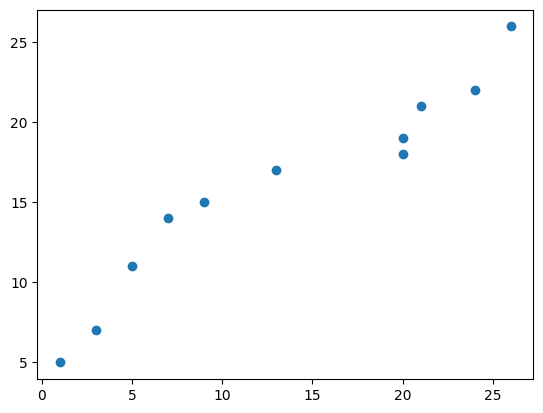

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1]) #ist column on x axis and 2nd column on y axis
plt.show()

Now shift the mean to zero

[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


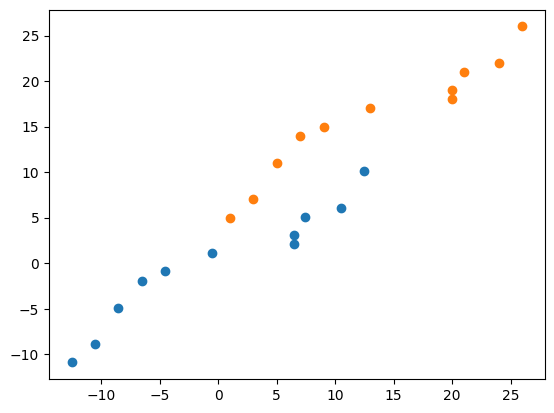

In [ ]:
x_meaned = x-np.mean(x, axis=0) #subtract mean of respective columns from respective entries
print(x_meaned)
plt.figure
plt.scatter(x_meaned[:,0], x_meaned[:,1])
plt.scatter(x[:,0], x[:,1])

mean of blue dots is zero, but mean of orange dots is not zero

In [ ]:
C = np.cov(x_meaned, rowvar=False)
print(C) #Co-variance matrix

[[80.87272727 54.95454545]
 [54.95454545 40.69090909]]


In [ ]:
eval,evec = np.linalg.eig(C) #eigen values and eigen vectors
print(eval)
print(evec)

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [ ]:
sorted_index = np.argsort(eval)[::-1] #descending order
sorted_eval = eval[sorted_index]
sorted_evec = evec[:,sorted_index]
print(sorted_eval)
print(sorted_evec)

[119.29375452   2.26988184]
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [ ]:
n=1
evec_subset=sorted_evec[:,0:n] #we will take ist eigen vector only which is principal eigen vector
print(evec_subset)

[[0.81956216]
 [0.57299028]]


In [ ]:
x_reduced = np.dot(evec_subset.transpose(), x_meaned.transpose()).transpose()
print(x_reduced) # 1D data

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]


#Shortcut method

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x_meaned)
new_x_reduced = pca.transform(x_meaned)
print(new_x_reduced)

[[-16.53258291]
 [-13.74747803]
 [ -9.81639259]
 [ -6.45829743]
 [ -4.24618282]
 [  0.17804639]
 [  6.48797183]
 [  7.0609621 ]
 [  9.02650482]
 [ 12.05818159]
 [ 15.98926703]]
